# __Figures for manuscript:__

## _"Observing the origins of human brain development: Automated processing for fetal functional MRI data"_

In [1]:
%matplotlib inline

In [27]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import nilearn
from nilearn import plotting
from nilearn import datasets
import nibabel as nib
import mni_atlas_reader
import sklearn
from scipy.stats import norm
from scipy.stats.stats import pearsonr
import seaborn as sns

In [57]:
sub_dice = pd.read_csv('BySubjectEvaluation.csv')

In [58]:
sub_dice.columns

Index(['Subject', 'Age (days)', 'SD Age (days)', 'Dice', 'Dice SD',
       'Sensitivity', 'Sensitivity SD', 'Specificty', 'Specificty SD',
       'Accuracy', 'Accuracy SD'],
      dtype='object')

In [59]:
pearsonr(sub_dice['Age (days)'], sub_dice['Dice'])

(0.5417732753482045, 4.838933829675793e-05)

In [61]:
pearsonr(sub_dice['Age (days)'], sub_dice['Specificty'])

(0.2786496300122021, 0.050052219484636534)

In [62]:
pearsonr(sub_dice['Age (days)'], sub_dice['Sensitivity'])

(0.22573457691770932, 0.11497200026081966)

In [63]:
pearsonr(sub_dice['Age (days)'], sub_dice['Accuracy'])

(0.2210426588137859, 0.12292155675040105)

In [64]:
sub_dice

,Subject,Age (days),SD Age (days),Dice,Dice SD,Sensitivity,Sensitivity SD,Specificty,Specificty SD,Accuracy,Accuracy SD
0,2006-T1,245,0,0.922346,0.000000,0.895472,0.000000,0.998855,0.000000,0.996358,0.000000
1,2013-T1,213,0,0.971419,0.003257,0.986023,0.006982,0.999083,0.000201,0.998816,0.000125
2,2019-T1,144,0,0.379185,0.033020,0.951795,0.030847,0.989691,0.001514,0.989564,0.001446
3,2020-T2,243,0,0.980632,0.000574,0.983594,0.004932,0.999449,0.000145,0.999067,0.000031
4,2029-T1,213,0,0.962772,0.002636,0.969550,0.003095,0.999147,0.000015,0.998591,0.000056
5,2031-T1,175,0,0.915970,0.013791,0.928978,0.025425,0.998791,0.000732,0.997960,0.000422
6,2033-T1,199,0,0.831816,0.000000,0.970560,0.000000,0.994456,0.000000,0.994097,0.000000
7,2033-T2,256,0,0.955944,0.006126,0.930453,0.013294,0.999471,0.000156,0.997270,0.000394
8,2035-T1,248,0,0.966555,0.006698,0.980349,0.007548,0.998678,0.000340,0.998188,0.000374
9,2037-T1,195,0,0.926114,0.002620,0.922428,0.006133,0.998888,0.000186,0.997682,0.000071


/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


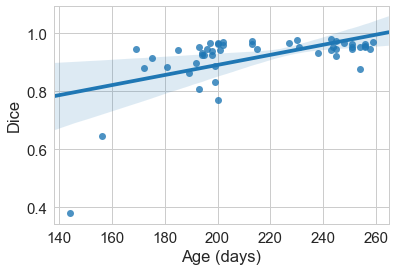

In [65]:
plt.style.use('seaborn-whitegrid')
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})
sns.regplot(x=sub_dice["Age (days)"], y=sub_dice["Dice"])
#plt.savefig('BySubject_DicevsAge.png',bbox_inches='tight')

/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


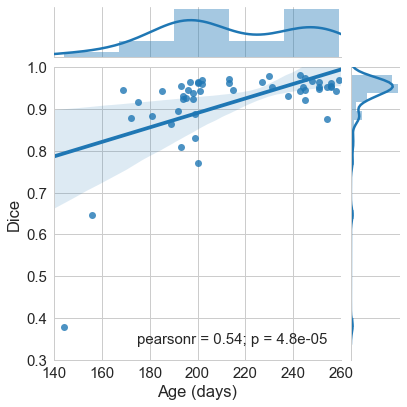

In [66]:
plt.style.use('seaborn-whitegrid')
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})
avg_dice_plot = sns.jointplot(x=sub_dice["Age (days)"], y=sub_dice["Dice"], kind="reg",
                  xlim=(140, 260), ylim=(0.3, 1))

/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


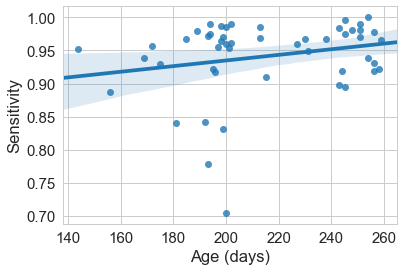

In [67]:
plt.style.use('seaborn-whitegrid')
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})
sns.regplot(x=sub_dice["Age (days)"], y=sub_dice["Sensitivity"])
#plt.savefig('BySubject_SensitivityvsAge.png',bbox_inches='tight')

/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


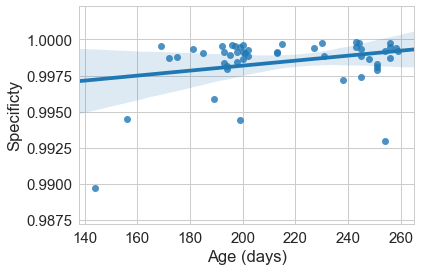

In [69]:
plt.style.use('seaborn-whitegrid')
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})
sns.regplot(x=sub_dice["Age (days)"], y=sub_dice["Specificty"])
#plt.savefig('BySubject_SpecificityvsAge.png',bbox_inches='tight')

/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


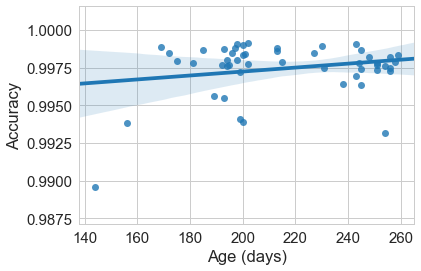

In [70]:
plt.style.use('seaborn-whitegrid')
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})
sns.regplot(x=sub_dice["Age (days)"], y=sub_dice["Accuracy"])
#plt.savefig('BySubject_AccuracyvsAge.png',bbox_inches='tight')

In [71]:
vol_dice = pd.read_csv('ByVolumeEvaluation.csv')

In [72]:
vol_dice.columns

Index(['Subject', 'Age', 'Run', 'Volume short', 'Volume long', 'Accuracy',
       'Dice', 'Sensitivity', 'Specificty'],
      dtype='object')

In [73]:
vol_dice.rename(columns={'Age': 'Age (days)'}, inplace=True)

In [74]:
vol_dice

,Subject,Age (days),Run,Volume short,Volume long,Accuracy,Dice,Sensitivity,Specificty
0,2006-T1,245,run1,vol0017.nii.npy,zpr_2006-T1_run1_vol0017.nii.npy,0.995056,0.887209,0.805026,0.999760
1,2013-T1,213,run1,vol0160.nii.npy,zpr_2013-T1_run1_vol0160.nii.npy,0.998780,0.970264,0.988062,0.999000
2,2013-T1,213,run1,vol0060.nii.npy,zpr_2013-T1_run1_vol0060.nii.npy,0.998642,0.966669,0.969251,0.999252
3,2013-T1,213,run1,vol0078.nii.npy,zpr_2013-T1_run1_vol0078.nii.npy,0.998672,0.967095,0.988566,0.998875
4,2013-T1,213,run1,vol0043.nii.npy,zpr_2013-T1_run1_vol0043.nii.npy,0.998927,0.974914,0.982456,0.999284
5,2013-T1,213,run1,vol0127.nii.npy,zpr_2013-T1_run1_vol0127.nii.npy,0.998636,0.967836,0.991075,0.998796
6,2019-T1,144,run1,vol0121.nii.npy,zpr_2019-T1_run1_vol0121.nii.npy,0.989997,0.395106,0.994643,0.989982
7,2019-T1,144,run1,vol0150.nii.npy,zpr_2019-T1_run1_vol0150.nii.npy,0.990525,0.402883,0.972346,0.990585
8,2019-T1,144,run2,vol0100.nii.npy,zpr_2019-T1_run2_vol0100.nii.npy,0.991102,0.424943,0.973090,0.991163
9,2019-T1,144,run2,vol0170.nii.npy,zpr_2019-T1_run2_vol0170.nii.npy,0.989507,0.382465,0.976211,0.989551


/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


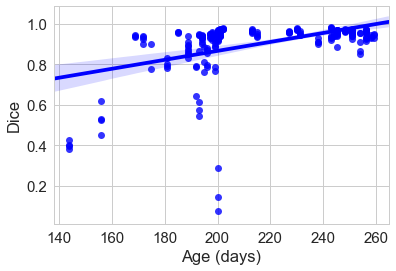

In [75]:
plt.style.use('seaborn-whitegrid')
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})
sns.regplot(x=vol_dice["Age (days)"], y=vol_dice["Dice"], color="b")
#plt.savefig('AllVolumes_DicevsAge.png',bbox_inches='tight')

/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


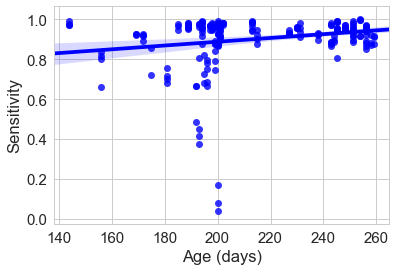

In [76]:
plt.style.use('seaborn-whitegrid')
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})
sns.regplot(x=vol_dice["Age (days)"], y=vol_dice["Sensitivity"], color="b")
#plt.savefig('AllVolumes_SensitivityvsAge.png',bbox_inches='tight')

/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


(0.985, 1.001)

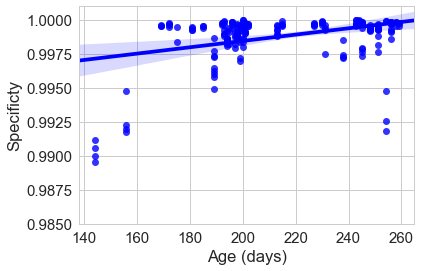

In [77]:
plt.style.use('seaborn-whitegrid')
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})
sns.regplot(x=vol_dice["Age (days)"], y=vol_dice["Specificty"], color="b")
plt.ylim(0.985, 1.001)
#plt.savefig('AllVolumes_SpecificityvsAge.png',bbox_inches='tight')

/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


(0.98, 1.0)

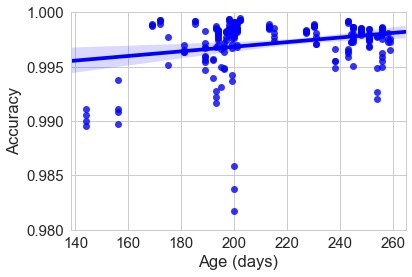

In [78]:
plt.style.use('seaborn-whitegrid')
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})
sns.regplot(x=vol_dice["Age (days)"], y=vol_dice["Accuracy"],color="b")
plt.ylim(0.98, 1.00)
#sns.plt.xlim(0, None)
#plt.savefig('AllVolumes_AccuracyvsAge.png',bbox_inches='tight')

/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


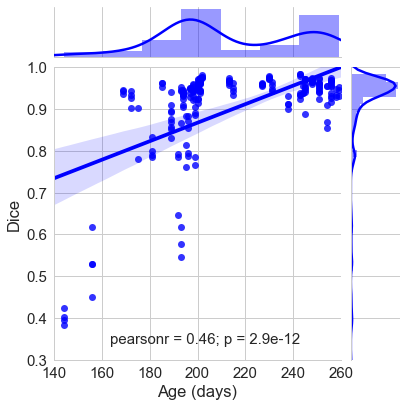

In [80]:
plt.style.use('seaborn-whitegrid')
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})
all_dice_plot= sns.jointplot(x=vol_dice["Age (days)"], y=vol_dice["Dice"], kind="reg",
                  xlim=(140, 260), ylim=(0.3, 1), color="b")

[[]]

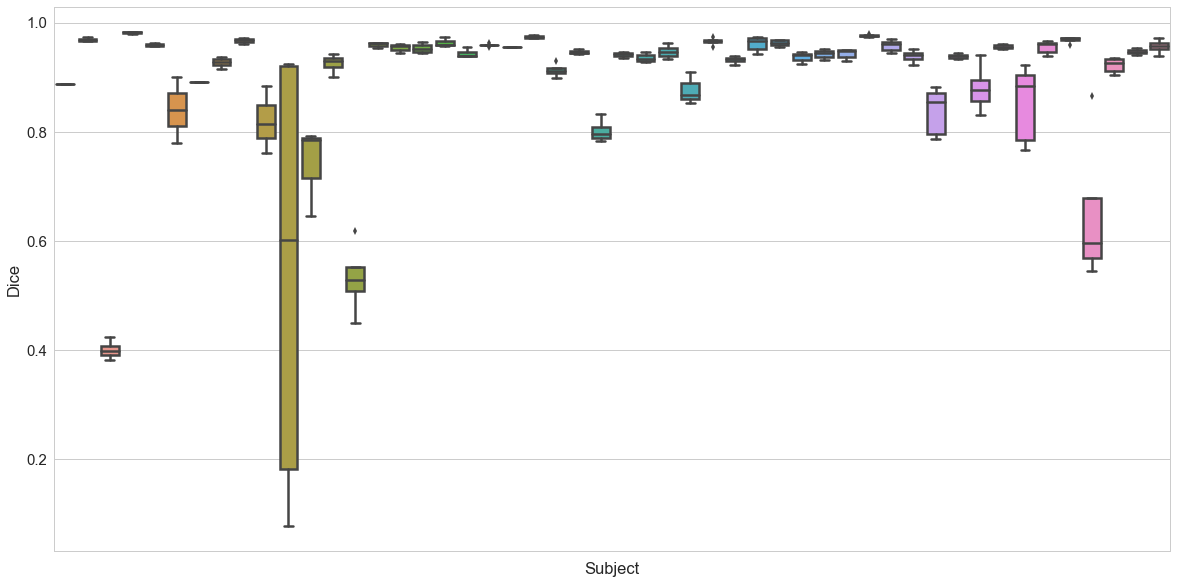

In [79]:
plt.figure(figsize=(20,10)) # this creates a figure 8 inch wide, 4 inch high
g = sns.boxplot(x=vol_dice["Subject"], y=vol_dice["Dice"])
g.set(xticklabels=[])

In [38]:
yale_dice = pd.read_csv('YaleEvaluation.csv')

In [42]:
yale_dice.columns

Index(['Subject', 'Age', 'Volume', 'Dice'], dtype='object')

In [40]:
#Remove subject that we do not have age information for
yale_dice = yale_dice[np.isfinite(yale_dice['Age'])]

In [41]:
yale_dice

,Subject,Age,Volume,Dice
0,FS0001,30.14,zpr_FS0001_S009_vol0100.nii.gz,0.9135
1,FS0001,30.14,zpr_FS0001_S013_vol0100.nii.gz,0.9192
2,FS0001,30.14,zpr_FS0001_S015_vol0100.nii.gz,0.9164
3,FS0001,30.14,zpr_FS0001_S020_vol0100.nii.gz,0.9099
4,FS0002,30.00,zpr_FS0002_S004_vol0100.nii.gz,0.9399
5,FS0002,30.00,zpr_FS0002_S006_vol0100.nii.gz,0.9383
6,FS0002,30.00,zpr_FS0002_S008_vol0100.nii.gz,0.9419
7,FS0002,30.00,zpr_FS0002_S010_vol0100.nii.gz,0.9374
8,FS0002,30.00,zpr_FS0002_S014_vol0100.nii.gz,0.9447
9,FS0004,30.43,zpr_FS0004_S005_vol0100.nii.gz,0.8445


In [43]:
pearsonr(yale_dice['Age'], yale_dice['Dice'])

(-0.16328617186798475, 0.27278549920739986)

/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


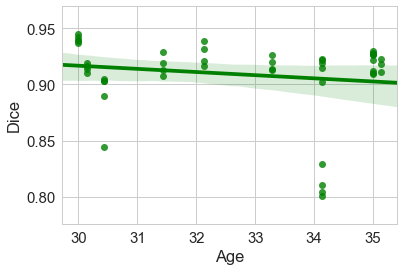

In [44]:
plt.style.use('seaborn-whitegrid')
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})
sns.regplot(x=yale_dice["Age"], y=yale_dice["Dice"], color="g")
#plt.savefig('EBpMdAvsCPZ_black.png',bbox_inches='tight')

/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


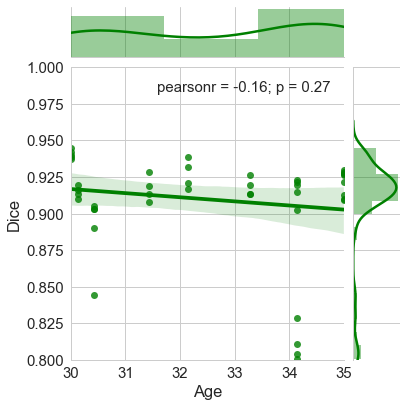

In [45]:
plt.style.use('seaborn-whitegrid')
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})
all_dice_plot= sns.jointplot(x=yale_dice["Age"], y=yale_dice["Dice"], kind="reg",
                  xlim=(30, 35), ylim=(0.8, 1), color="g")